## TASKS


2) Set to array



In [53]:
ETH_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_intermediate/complete_cancer_candidates_order_r_complete.tsv.gz'
eth_df=pd.read_csv(ETH_PATH, sep = '\t', low_memory=False)
eth_df

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,cancerCohortfilter >=5.0,cancerCohortfilter >=10.0,TCGAC8A12P01A11RA11507all,TCGAAOA0JM01A21RA05607all,TCGABHA18V01A11RA12D07all,TCGAA2A0D201A21RA03407all,TCGAA2A0SX01A12RA08407all,isAnnotated
0,WYITRSGIA,3290.0,1969.0,861.0,394.0,89.0,4.0,92347505:92347506:92349915:92349941:None:None,False,False,...,138,82,26,5,0.000000,0.000000,0.000000,4.102634,0.000000,NaN
1,WYITRSGIA,572.0,545.0,243.0,130.0,27.0,2.0,92347505:92347506:92349915:92349941:None:None,False,False,...,138,82,26,5,0.000000,0.000000,0.000000,4.102634,0.000000,NaN
2,ISSQSRVEK,278.0,261.0,82.0,29.0,7.0,0.0,92379851:92379859:92493866:92493885:None:None,False,False,...,10,2,0,0,0.000000,0.000000,2.474321,0.000000,0.000000,NaN
3,RSGDEEKYP,7350.0,4622.0,2653.0,1745.0,1126.0,734.0,92600493:92600508:92611313:92611325:None:None,True,True,...,641,520,348,170,2.922641,2.102386,1.237161,0.000000,0.000000,1.0
4,HLKMKMFQI,146.0,136.0,42.0,20.0,3.0,1.0,92379850:92379859:92496416:92496434:None:None,False,False,...,16,2,0,0,2.922641,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22348810,DSAVDFTGR,8409.0,7290.0,5881.0,4758.0,3323.0,1612.0,121183457:121183462:121181326:121181348:None:None,True,True,...,126,78,20,1,0.000000,0.000000,3.711482,2.735089,1.140192,1.0
22348811,LKWLLLLSL,521.0,489.0,234.0,124.0,41.0,2.0,121181270:121181278:121180861:121180880:None:None,False,False,...,5,1,0,0,0.000000,0.000000,1.237161,0.000000,0.000000,NaN
22348812,CLKWCKHPT,506.0,476.0,180.0,88.0,29.0,2.0,121181270:121181281:121168819:121168835:None:None,True,False,...,67,36,3,0,0.000000,0.000000,1.237161,0.000000,4.560769,1.0
22348813,KWLLLLSLF,521.0,489.0,234.0,124.0,41.0,2.0,121181270:121181275:121180858:121180880:None:None,False,False,...,5,1,0,0,0.000000,0.000000,1.237161,0.000000,0.000000,NaN


# 7. Take one sample and 3 filtering conditions. One with ~30 percent intersection (A). One other with 20 % intersection (B) and one with 12 % (C) intersection.

In [3]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *

In [4]:
#No home directory, use only /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/

In [5]:
PATH_ETH=create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,ETH_PATH_BRCA])
PATH_OHSU=create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,OHSU_PATH_BRCA])
PATH_filter=create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FILTERING_BRCA])
sample = 'TCGAC8A12P01A11RA11507'
COLUMNS=['kmer',sample]
data = pd.read_csv(PATH_filter, sep=";", low_memory=False)
ETH = pd.read_csv(PATH_ETH, sep="\t", low_memory=False)
OHSU = pd.read_csv(PATH_OHSU, sep="\t", low_memory=False)

In [6]:
OHSU.rename(columns = {'in-frame_neoepitopes': 'kmer'}, inplace = True)
OHSU = table_processing.change_column_names(OHSU)
OHSU = table_processing.preprocess_ohsu(OHSU)
ETH.rename(columns = ETH_COLMNS, inplace = True)
data.drop(columns=data.columns[0])
data

,Unnamed: 0,sample,filter_foreground,filter_background,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
0,0,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across10,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,445,376,136,309,240,"['VPKLQPLLP', 'YQSFSLFCL', 'PLNRVLFCR', 'WKTIH...","['QELRRSWPR', 'THIPGCYVT', 'ITIYSWSLS', 'SPDGR...","['PLLYKTEFC', 'ERGAAGSCW', 'AAKPNEEIS', 'LYKTE..."
1,1,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim1.0Across2,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,94,27,130,67,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
2,2,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim0.0Across1,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,93,27,130,66,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."
4,4,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across2,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,253,193,61,192,132,"['RWKTIHRKF', 'WKTIHRKQS', 'MNGRIVRAV', 'VQLGP...","['CIRNWSLSL', 'NTQVKQHPF', 'ATTAGTGRR', 'GTKGE...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,9,TCGAA2A0SX01A12RA08407,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,80,45,35,45,10,"['PFPPASPSP', 'AGPFPPASP', 'GPFPPASPS', 'FPPAS...","['DNMSYSVED', 'LQPKSKRRA', 'KVQESPAPS', 'HPGPS...","['MKNQLLRRL', 'QIFVKTLRW', 'TGKPGKRGD', 'NSDMK..."
66,10,TCGAA2A0SX01A12RA08407,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0AcrossAny,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,107,58,48,59,10,"['PFPPASPSP', 'AGPFPPASP', 'GPFPPASPS', 'FPPAS...","['DNMSYSVED', 'LQPKSKRRA', 'KVQESPAPS', 'HPGPS...","['MKNQLLRRL', 'QIFVKTLRW', 'SLDCHNAFA', 'TGKPG..."
67,11,TCGAA2A0SX01A12RA08407,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim0.0Across1,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,22,13,6,16,7,"['PFPPASPSP', 'AGPFPPASP', 'GPFPPASPS', 'FPPAS...","['EDMRHPGPS', 'RWDANLRED', 'PKMNIKAPK', 'DMRHP...","['QIFVKTLRW', 'IFVKTLRWD', 'TLRWDANLR', 'FVKTL..."
68,12,TCGAA2A0SX01A12RA08407,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across2,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,176,90,46,130,44,"['MSFAESPAS', 'FPPASPSPE', 'PMNGQIESL', 'EDLMD...","['KGEGLGASR', 'VKEKFETLR', 'HPGPSSSWW', 'AGKAP...","['EEEGSPSAD', 'QIFVKTLRW', 'VKTLRWDAN', 'KINTD..."


In [8]:
data = data.loc[(data['sample']==sample)]
inter=np.array(data['size_intersection'])
s_ETH=np.array(data['size_eth\ohsu'])
s_OHSU=np.array(data['size_ohsu\eth'])

snum = inter+s_ETH+s_OHSU
ninter = inter/snum*100.

data.insert(loc=4,column='inter % total',value=ninter)
data

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
0,0,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across10,19.854015,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,445,376,136,309,240,"['VPKLQPLLP', 'YQSFSLFCL', 'PLNRVLFCR', 'WKTIH...","['QELRRSWPR', 'THIPGCYVT', 'ITIYSWSLS', 'SPDGR...","['PLLYKTEFC', 'ERGAAGSCW', 'AAKPNEEIS', 'LYKTE..."
1,1,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim1.0Across2,12.053571,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,94,27,130,67,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
2,2,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim0.0Across1,12.107623,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,93,27,130,66,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,32.846715,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."
4,4,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0Across2,15.844156,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,253,193,61,192,132,"['RWKTIHRKF', 'WKTIHRKQS', 'MNGRIVRAV', 'VQLGP...","['CIRNWSLSL', 'NTQVKQHPF', 'ATTAGTGRR', 'GTKGE...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."
5,5,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across2,34.831461,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,43,77,31,12,46,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'QVENN...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'AKVTSSRIH', 'LVYAAKPNE', 'KQFIE..."
6,6,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim3.0AcrossAny,22.208738,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,553,454,183,370,271,"['VPKLQPLLP', 'APLVSVGNF', 'YQSFSLFCL', 'PLNRV...","['QELRRSWPR', 'THIPGCYVT', 'ITIYSWSLS', 'SPDGR...","['PLLYKTEFC', 'ERGAAGSCW', 'AAKPNEEIS', 'LYKTE..."
7,7,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0AcrossAny,36.419753,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,102,119,59,43,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'NTLPTKDGH', 'SDLHH...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."
8,8,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim1.0AcrossAny,20.000000,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,20,28,8,12,20,"['RKQSPVLSP', 'WKTIHRKQS', 'QVENNSSKT', 'ENNSS...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'GALVYAAKP', 'AGALVYAAK', 'LVYAA..."
9,9,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim1.0Across10,20.000000,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,20,28,8,12,20,"['RKQSPVLSP', 'WKTIHRKQS', 'QVENNSSKT', 'ENNSS...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'GALVYAAKP', 'AGALVYAAK', 'LVYAA..."


In [9]:
def detect_sample(data,sample,percent):
    out = data.loc[(data['sample']==sample)&(data['inter % total']==percent)]
    i=1
    while True:
        if out.empty:
            out = data.loc[(data['sample']==sample)&(data['inter % total']>percent-0.1*i)&(data['inter % total']<percent+0.1*i)]
        else:
            break
        i+=1
    
    out = out.sample()
    return out

detect_sample(data,sample,30)

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,32.846715,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."


In [10]:
fil_con_A=detect_sample(data,sample,30)#['inter_kmers']
fil_con_B=detect_sample(data,sample,20)#['inter_kmers']
fil_con_C=detect_sample(data,sample,12)#['inter_kmers']
name_A=fil_con_A['filter']
name_B=fil_con_B['filter']
name_C=fil_con_C['filter']

fil_con_A

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
3,3,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim3.0Across10,32.846715,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,77,105,45,32,60,"['RKQSPVLSP', 'RWKTIHRKF', 'WKTIHRKQS', 'LVLPV...","['SSDLHHQQN', 'GANRRTGRQ', 'SDLHHQQND', 'ANRRT...","['AAKPNEEIS', 'AGGLHGEFG', 'PVGAAGGLH', 'AKVTS..."


In [11]:
fil_con_B

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
12,12,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across5,FiltNormalsGtexCohortCohortlim1.0Across2,20.0,SampleLim0.0CohortLim2.0Across5 FiltNormalsGte...,20,28,8,12,20,"['RKQSPVLSP', 'WKTIHRKQS', 'QVENNSSKT', 'ENNSS...","['GSTSSDLHH', 'SSDLHHQQN', 'TGSTSSDLH', 'DTGST...","['AAKPNEEIS', 'GALVYAAKP', 'AGALVYAAK', 'LVYAA..."


In [12]:
fil_con_C

,Unnamed: 0,sample,filter_foreground,filter_background,inter % total,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,size_eth\ohsu,eth_kmers\inter,ohsu_kmers\inter,inter_kmers
10,10,TCGAC8A12P01A11RA11507,SampleLim0.0CohortLim2.0Across1,FiltNormalsGtexCohortCohortlim1.0AcrossAny,12.053571,SampleLim0.0CohortLim2.0Across1 FiltNormalsGte...,157,94,27,130,67,"['RKQSPVLSP', 'NGRIVRAVP', 'WKTIHRKQS', 'MNGRI...","['NTQVKQHPF', 'ATTAGTGRR', 'GAGVRAQRP', 'QELRR...","['AAKPNEEIS', 'ERGAAGSCW', 'GSSSKGRGS', 'GRGSR..."


In [13]:
fil_con_A=set(fil_con_A['inter_kmers'])
fil_con_B=set(fil_con_B['inter_kmers'])
fil_con_C=set(fil_con_C['inter_kmers'])

# a.Isolate the kmers sequences for test1= A.difference(B) and test2= B.difference(C).

In [14]:
test1 = fil_con_A.difference(fil_con_B)
test2 = fil_con_B.difference(fil_con_C)

In [16]:
l_test1=list(test1)
t1 = l_test1[0][1:][::-1][1:][::-1].split("', '")
t1[0]=t1[0].replace("'","")
t1[-1]=t1[0-1].replace("'","")
t1

# Additional algoritm

['AAKPNEEIS',
 'AGGLHGEFG',
 'PVGAAGGLH',
 'AKVTSSRIH',
 'LVYAAKPNE',
 'AAGGLHGEF',
 'KQFIENSNC',
 'IPYTIKSKA',
 'GKQFIENSN',
 'TRRQREQGA',
 'KVTSSRIHS',
 'VGAAGGLHG',
 'ENSNCQLGT',
 'FIENSNCQL',
 'REQGAFPTT',
 'GALVYAAKP',
 'AGALVYAAK',
 'IKSKAVRGE',
 'RQREQGAFP',
 'SKAVRGEQG',
 'TIKSKAVRG',
 'VAGALVYAA',
 'GGKQFIENS',
 'SSRIHSGEK',
 'TAKVTSSRI',
 'IENSNCQLG',
 'VITRRQREQ',
 'KSKAVRGEQ',
 'ITRRQREQG',
 'RIHSGEKYL',
 'SRIHSGEKY',
 'KAVRGEQGT',
 'VYAAKPNEE',
 'PYTIKSKAV',
 'ALVYAAKPN',
 'GPVGAAGGL',
 'YTIKSKAVR',
 'QREQGAFPT',
 'NSNCQLGTV',
 'TSSRIHSGE',
 'GAAGGLHGE',
 'QFIENSNCQ',
 'RRQREQGAF',
 'VTSSRIHSG',
 'YAAKPNEEI']

# b.Then go back to the OHSU and ETH generation tables, select rows with the kmers test1.

In [18]:
# b_eth = ETH.loc[ETH['kmer'].isin(t1)]
# b_eth = b_eth.set_index('kmer')
# b_eth

kmers_interest=t1
b_eth = ETH.set_index('kmer')
b_eth1 = b_eth.loc[kmers_interest , [col for col in ETH.columns if 'TCGA' in col]]
b_eth1

,TCGAC8A12P01A11RA11507,TCGAAOA0JM01A21RA05607,TCGABHA18V01A11RA12D07,TCGAA2A0D201A21RA03407,TCGAA2A0SX01A12RA08407
kmer,,,,,
AAKPNEEIS,4.383962,0.0,0.0,0.0,0.0
AGGLHGEFG,1.461321,0.0,0.0,0.0,0.0
PVGAAGGLH,1.461321,0.0,0.0,0.0,0.0
AKVTSSRIH,4.383962,0.0,0.0,0.0,0.0
LVYAAKPNE,4.383962,0.0,0.0,0.0,0.0
AAGGLHGEF,1.461321,0.0,0.0,0.0,0.0
KQFIENSNC,86.217919,0.0,0.0,0.0,0.0
IPYTIKSKA,1.461321,0.0,0.0,0.0,0.0
GKQFIENSN,86.217919,0.0,0.0,0.0,0.0


In [19]:
# b_ohsu = OHSU.loc[(OHSU['kmer'].isin(t1))]
# b_ohsu = b_ohsu.set_index('kmer')
# b_ohsu

kmers_interest=t1
b_ohsu = OHSU.set_index('kmer')
b_ohsu1 = b_ohsu.loc[kmers_interest , [col for col in OHSU.columns if 'TCGA' in col]]
b_ohsu1

,TCGA24143101A01R156613,TCGA24229801A01R156913,TCGA25131301A01R156513,TCGA25131901A01R156513,TCGA61200801A02R156813,TCGAA2A0D201A21RA03407,TCGAA2A0SX01A12RA08407,TCGAAOA0JM01A21RA05607,TCGABHA18V01A11RA12D07,TCGAC8A12P01A11RA11507,all_TCGA_over0,all_TCGA_over1,all_TCGA_over3
kmer,,,,,,,,,,,,,
AAKPNEEIS,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.383962,0.0,0.0,0.0
AGGLHGEFG,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
PVGAAGGLH,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
AKVTSSRIH,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.383962,0.0,0.0,0.0
LVYAAKPNE,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.383962,0.0,0.0,0.0
AAGGLHGEF,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
KQFIENSNC,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,86.217919,0.0,0.0,0.0
IPYTIKSKA,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.461321,0.0,0.0,0.0
GKQFIENSN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,86.217919,0.0,0.0,0.0


# c.Extract the expression in the sample. Plot it across kmers. Extract the number of BRCA samples with expression >=2 reads. Plot it across kmers.


<Figure size 2160x648 with 0 Axes>

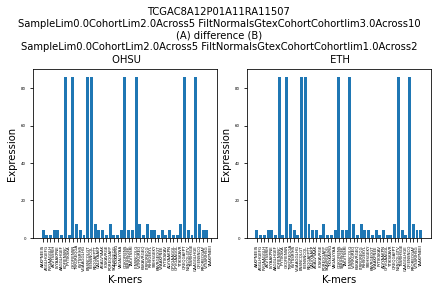

In [43]:
matplotlib.rcParams.update({'font.size':4})
x1 = b_ohsu1.index
y1 = b_ohsu1[sample]
x2 = b_eth1.index
y2 = b_eth1[sample]

plt.figure(figsize=(30, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]



ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.suptitle(sample+'\n'+name_A.values[0]+'\n'+'(A) difference (B)'+'\n'+name_B.values[0], size = 10)

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers', size = 10)
ax1.set_ylabel('Expression', size = 10)
ax1.set_title(' OHSU', size = 10)

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers', size = 10)
ax2.set_ylabel('Expression', size = 10)
ax2.set_title(' ETH', size = 10)

# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

In [45]:
interm_eth = b_eth1 >=2
interm_eth_s=interm_eth.sum(axis = 1)
interm_eth_s

kmer
AAKPNEEIS    1
AGGLHGEFG    0
PVGAAGGLH    0
AKVTSSRIH    1
LVYAAKPNE    1
AAGGLHGEF    0
KQFIENSNC    1
IPYTIKSKA    0
GKQFIENSN    1
TRRQREQGA    1
KVTSSRIHS    1
VGAAGGLHG    0
ENSNCQLGT    1
FIENSNCQL    1
REQGAFPTT    1
GALVYAAKP    1
AGALVYAAK    1
IKSKAVRGE    0
RQREQGAFP    1
SKAVRGEQG    0
TIKSKAVRG    0
VAGALVYAA    1
GGKQFIENS    1
SSRIHSGEK    1
TAKVTSSRI    1
IENSNCQLG    1
VITRRQREQ    1
KSKAVRGEQ    0
ITRRQREQG    1
RIHSGEKYL    1
SRIHSGEKY    1
KAVRGEQGT    0
VYAAKPNEE    1
PYTIKSKAV    0
ALVYAAKPN    1
GPVGAAGGL    0
YTIKSKAVR    0
QREQGAFPT    1
NSNCQLGTV    1
TSSRIHSGE    1
GAAGGLHGE    0
QFIENSNCQ    1
RRQREQGAF    1
VTSSRIHSG    1
YAAKPNEEI    1
dtype: int64

In [46]:
interm_eth

,TCGAC8A12P01A11RA11507,TCGAAOA0JM01A21RA05607,TCGABHA18V01A11RA12D07,TCGAA2A0D201A21RA03407,TCGAA2A0SX01A12RA08407
kmer,,,,,
AAKPNEEIS,True,False,False,False,False
AGGLHGEFG,False,False,False,False,False
PVGAAGGLH,False,False,False,False,False
AKVTSSRIH,True,False,False,False,False
LVYAAKPNE,True,False,False,False,False
AAGGLHGEF,False,False,False,False,False
KQFIENSNC,True,False,False,False,False
IPYTIKSKA,False,False,False,False,False
GKQFIENSN,True,False,False,False,False


In [47]:
interm_ohsu = b_ohsu1 >=2
interm_ohsu_s=interm_ohsu.sum(axis = 1)
interm_ohsu_s

kmer
AAKPNEEIS    1
AGGLHGEFG    0
PVGAAGGLH    0
AKVTSSRIH    1
LVYAAKPNE    1
AAGGLHGEF    0
KQFIENSNC    1
IPYTIKSKA    0
GKQFIENSN    1
TRRQREQGA    1
KVTSSRIHS    1
VGAAGGLHG    0
ENSNCQLGT    1
FIENSNCQL    1
REQGAFPTT    1
GALVYAAKP    1
AGALVYAAK    1
IKSKAVRGE    0
RQREQGAFP    1
SKAVRGEQG    0
TIKSKAVRG    0
VAGALVYAA    1
GGKQFIENS    1
SSRIHSGEK    1
TAKVTSSRI    1
IENSNCQLG    1
VITRRQREQ    1
KSKAVRGEQ    0
ITRRQREQG    1
RIHSGEKYL    1
SRIHSGEKY    1
KAVRGEQGT    0
VYAAKPNEE    1
PYTIKSKAV    0
ALVYAAKPN    1
GPVGAAGGL    0
GPVGAAGGL    0
YTIKSKAVR    0
QREQGAFPT    1
NSNCQLGTV    1
TSSRIHSGE    1
GAAGGLHGE    0
QFIENSNCQ    1
RRQREQGAF    1
VTSSRIHSG    1
YAAKPNEEI    1
dtype: int64

In [48]:
interm_ohsu

,TCGA24143101A01R156613,TCGA24229801A01R156913,TCGA25131301A01R156513,TCGA25131901A01R156513,TCGA61200801A02R156813,TCGAA2A0D201A21RA03407,TCGAA2A0SX01A12RA08407,TCGAAOA0JM01A21RA05607,TCGABHA18V01A11RA12D07,TCGAC8A12P01A11RA11507,all_TCGA_over0,all_TCGA_over1,all_TCGA_over3
kmer,,,,,,,,,,,,,
AAKPNEEIS,False,False,False,False,False,False,False,False,False,True,False,False,False
AGGLHGEFG,False,False,False,False,False,False,False,False,False,False,False,False,False
PVGAAGGLH,False,False,False,False,False,False,False,False,False,False,False,False,False
AKVTSSRIH,False,False,False,False,False,False,False,False,False,True,False,False,False
LVYAAKPNE,False,False,False,False,False,False,False,False,False,True,False,False,False
AAGGLHGEF,False,False,False,False,False,False,False,False,False,False,False,False,False
KQFIENSNC,False,False,False,False,False,False,False,False,False,True,False,False,False
IPYTIKSKA,False,False,False,False,False,False,False,False,False,False,False,False,False
GKQFIENSN,False,False,False,False,False,False,False,False,False,True,False,False,False


In [49]:
diff = 0
for eth,ohsu in zip(interm_eth_s,interm_ohsu_s):
        if interm_eth_s[eth]!=interm_ohsu_s[ohsu]:
            diff +=1
            print(interm_eth_s[eth],interm_ohsu_s[ohsu])
print(diff)
print(diff/interm_eth_s.shape[0]*100)

0 1
1 0
0 1
3
6.666666666666667


<Figure size 1152x648 with 0 Axes>

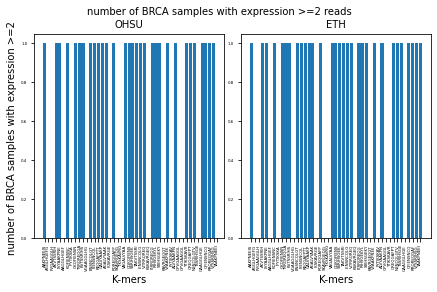

In [52]:
matplotlib.rcParams.update({'font.size':4})
x1=interm_ohsu_s.index
y1=interm_ohsu_s
x2=interm_eth_s.index
y2=interm_eth_s
plt.figure(figsize=(16, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]
    
ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.suptitle('number of BRCA samples with expression >=2 reads', size = 10)

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers', size = 10)
ax1.set_ylabel('number of BRCA samples with expression >=2 ', size = 10)
ax1.set_title('OHSU', size = 10)

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers', size = 10)
ax2.set_title('ETH', size = 10)

    
# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

# d.Extract the column for GTEX>0, GTEX>=1,  GTEX>=3. Plot it across kmers.


In [ ]:
    D = b_eth[['gtexCohortfilter >0.0','gtexCohortfilter >=1.0','gtexCohortfilter >=3.0']]
    GTEX0=np.array(D['gtexCohortfilter >0.0'])
    GTEX1=np.array(D['gtexCohortfilter >=1.0'])
    GTEX3=np.array(D['gtexCohortfilter >=3.0'])
    snum = GTEX0+GTEX1+GTEX3
        

    
    # Normalization data            
    nGTEX0 = GTEX0/snum*100.
    nGTEX1 = GTEX1/snum*100.
    nGTEX3 = GTEX3/snum*100.

    axis = {
            'size_eth % total':nGTEX0,
            'size_intersection % total':nGTEX1,
            'size_ohsu % total':nGTEX3
            }
    
    
    lg = len(D.index)
    
    x_main = D.index
    plt.figure(figsize=(16, 9))

    fig,ax = plt.subplots()
    bottom =np.zeros(lg)

    # stack bars
    for data, data_count in axis.items():
            p = ax.bar(D.index,data_count,label=data,bottom=bottom)
            bottom+=data_count

    # add text annotation corresponding to the percentage of each data.
    for xpos, ypos, yval in zip(fffb, nGTEX1/2, nGTEX1):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0/2, nGTEX0):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3/2, nGTEX03):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    # add text annotation corresponding to the "total" value of each bar
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3, snum):
        plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom",size=3)

    plt.ylim(0,110)
    bar_width=0.4
    bar_position_nGTEX1=range(len(nGTEX1))
    ax.set_xticks([pos for pos in bar_position_nGTEX1])
    ax.set_xticklabels(D.index,rotation=90,ha='center')
    ax.set_xlabel('K-mers')
    ax.set_ylabel('Count')
    ax.set_title(sample)
    
    plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
    

    plt.tight_layout()
    plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_GTEX]), bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    plt.close()

# e.Then do exactly the same plots for test2.

In [ ]:
l_test2=list(test2)
t2 = l_test2[0][1:][::-1][1:][::-1].split("', '")
t2[0]=t2[0].replace("'","")
t2[-1]=t2[0-1].replace("'","")
t2

In [ ]:
kmers_interest=t2
b_eth2 = b_eth.loc[kmers_interest , [col for col in ETH.columns if 'TCGA' in col]]
b_eth2

In [ ]:
kmers_interest=t2
b_ohsu2 = b_ohsu.loc[kmers_interest , [col for col in OHSU.columns if 'TCGA' in col]]
b_ohsu2

In [ ]:
x1 = b_ohsu2.index
y1 = b_ohsu2[sample]
x2 = b_eth2.index
y2 = b_eth2[sample]

plt.figure(figsize=(30, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]



ax1.bar(x1,y1)
ax2.bar(x2,y2)

plt.suptitle(sample)

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers')
ax1.set_ylabel('Expression')
ax1.set_title(' OHSU')

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers')
ax2.set_ylabel('Expression')
ax2.set_title(' ETH')

# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

In [ ]:
interm_eth2 = b_eth2 >=2
interm_eth_s2=interm_eth2.sum(axis = 1)
interm_eth_s2

In [ ]:
interm_ohsu2 = b_ohsu2 >=2
interm_ohsu_s2=interm_ohsu2.sum(axis = 1)
interm_ohsu_s2

In [ ]:
x1=interm_ohsu_s2.index
y=interm_ohsu_s2
x2=interm_eth_s2.index
y2=interm_eth_s2
plt.figure(figsize=(16, 9))

fig,ax = plt.subplots(nrows=1,ncols=2)
ax1=ax[0]
ax2=ax[1]
    
ax1.bar(x1,y1)
ax2.bar(x1,y1)

plt.suptitle('number of BRCA samples with expression >=2 reads')

ax1.set_xticks([pos for pos in range(len(x1))])
ax1.set_xticklabels(x1,rotation=90,ha='center')
ax1.set_xlabel('K-mers')
ax1.set_ylabel('number of BRCA samples with expression >=2 ')

ax2.set_xticks([pos for pos in range(len(x2))])
ax2.set_xticklabels(x2,rotation=90,ha='center')
ax2.set_xlabel('K-mers')

    
# Save plot
    
plt.tight_layout()
path_sample =create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_LOI_C1])
plt.savefig(path_sample, dpi=300)
plt.savefig('picture.png', dpi=300)
plt.show()

In [ ]:
    D = b_eth[['gtexCohortfilter >0.0','gtexCohortfilter >=1.0','gtexCohortfilter >=3.0']]
    GTEX0=np.array(D['gtexCohortfilter >0.0'])
    GTEX1=np.array(D['gtexCohortfilter >=1.0'])
    GTEX3=np.array(D['gtexCohortfilter >=3.0'])
    snum = GTEX0+GTEX1+GTEX3
        

    
    # Normalization data            
    nGTEX0 = GTEX0/snum*100.
    nGTEX1 = GTEX1/snum*100.
    nGTEX3 = GTEX3/snum*100.

    axis = {
            'size_eth % total':nGTEX0,
            'size_intersection % total':nGTEX1,
            'size_ohsu % total':nGTEX3
            }
    
    
    lg = len(D.index)
    
    x_main = D.index
    plt.figure(figsize=(16, 9))

    fig,ax = plt.subplots()
    bottom =np.zeros(lg)

    # stack bars
    for data, data_count in axis.items():
            p = ax.bar(D.index,data_count,label=data,bottom=bottom)
            bottom+=data_count

    # add text annotation corresponding to the percentage of each data.
    for xpos, ypos, yval in zip(fffb, nGTEX1/2, nGTEX1):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0/2, nGTEX0):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3/2, nGTEX03):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",size=3)
    # add text annotation corresponding to the "total" value of each bar
    for xpos, ypos, yval in zip(fffb, nGTEX1+nGTEX0+nGTEX3, snum):
        plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom",size=3)

    plt.ylim(0,110)
    bar_width=0.4
    bar_position_nGTEX1=range(len(nGTEX1))
    ax.set_xticks([pos for pos in bar_position_nGTEX1])
    ax.set_xticklabels(D.index,rotation=90,ha='center')
    ax.set_xlabel('K-mers')
    ax.set_ylabel('Count')
    ax.set_title(sample)
    
    plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
    

    plt.tight_layout()
    plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,NAME_PLOT_GTEX]), bbox_inches='tight', pad_inches=0.02, dpi=300)
    plt.show()
    plt.close()